In [86]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import rgb2hex
from descartes import PolygonPatch
from shapely.geometry import Polygon, MultiPolygon

In [123]:
import json

tweets_file = open('geotagged_tweets_20160812-0912.1000.jsons', "r")

def flatten_tweets(tweets_json):
    """ Flattens out tweet dictionaries so relevant JSON
        is in a top-level dictionary."""
    tweets_list = []
    
# Iterate through each tweet
    for tweet in tweets_json:
        tweet_obj = json.loads(tweet)

        tweets_list.append(tweet_obj)
    return tweets_list

tweets = flatten_tweets(tweets_file)

In [124]:
import pandas as pd

from pandas.io.json import json_normalize
# Thank gawd for this package - all json fields straight into columns in a dataframe, no bullshit
tweets_df = json_normalize(tweets)

tweets_df.head()

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,quoted_status.place.country,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str,geo.type,geo.coordinates,coordinates.type,coordinates.coordinates,quoted_status.scopes.followers
0,Sun Sep 11 02:05:23 +0000 2016,774790914589990912,774790914589990912,@HillaryClinton @POTUS @JudgeJeanine @NBA @NFL...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,1.339836e+09,1339835893,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Wed Aug 17 20:18:54 +0000 2016,766006411994292224,766006411994292224,IF THEY ONLY HAD A BRAIN! \n#NeverTrump #BuhBy...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fri Sep 02 23:06:23 +0000 2016,771846762533224448,771846762533224448,Attorney's first line of defense to those they...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Thu Sep 01 03:01:51 +0000 2016,771181247179558912,771181247179558912,@kikesma @norma22flores @EPN @realDonaldTrump ...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,7.710818e+17,771081824512643073,8.541293e+07,85412926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sat Sep 10 05:22:45 +0000 2016,774478196502700032,774478196502700032,Classy.. Better than I expected. But on a se...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
cols = []

for col in tweets_df.columns:
    if col in ('created_at', 'place.country','place.country_code','place.name','is_quote_status','lang','text','user.created_at','user.description','user.name','user.location','place.place_type', 'user-screen_name', 'in_reply_to_screen_name','geo.type','geo.coordinates', 'retweeted_status-text'):
        cols.append(col)

neat_df = tweets_df.loc[:, cols]
neat_df.head()

,created_at,text,in_reply_to_screen_name,is_quote_status,lang,user.name,user.location,user.description,user.created_at,place.place_type,place.name,place.country_code,place.country,geo.type,geo.coordinates
0,Sun Sep 11 02:05:23 +0000 2016,@HillaryClinton @POTUS @JudgeJeanine @NBA @NFL...,HillaryClinton,False,en,RonaldSouthwell,"Evansville, IN",#Election2016 #Election2016,Fri Jun 24 13:46:12 +0000 2016,city,Evansville,US,United States,NaN,NaN
1,Wed Aug 17 20:18:54 +0000 2016,IF THEY ONLY HAD A BRAIN! \n#NeverTrump #BuhBy...,None,False,en,Jimmy Bear,"Nutley, New Jersey",#TeamGay.#Atheist.HATE is NOT a Family Value.J...,Mon Aug 15 12:09:02 +0000 2011,city,Nutley,US,United States,NaN,NaN
2,Fri Sep 02 23:06:23 +0000 2016,Attorney's first line of defense to those they...,None,False,en,Pops,"Oklahoma City, OK",Patriot. Constitutionalist. Conservative. Anti...,Wed Aug 22 14:38:00 +0000 2012,city,Oklahoma City,US,United States,NaN,NaN
3,Thu Sep 01 03:01:51 +0000 2016,@kikesma @norma22flores @EPN @realDonaldTrump ...,kikesma,False,es,Alonso Betancurt,None,None,Wed May 21 21:39:25 +0000 2014,city,Villaldama,MX,México,NaN,NaN
4,Sat Sep 10 05:22:45 +0000 2016,Classy.. Better than I expected. But on a se...,None,True,en,William McCarthy,"Massachusetts, USA",Kasich supporter. never ever trump. trump is j...,Tue Feb 23 03:13:22 +0000 2016,city,Marblehead,US,United States,NaN,NaN


In [128]:
import re


#probably gotta clean it more but this is a first step
def clean_text(dataframe, col):
    # make new column for accounts
    dataframe.loc[:, "accounts"] = dataframe[col].str.findall(r'@.*?(?=\s|$)')
    # make new column for hashtag
    dataframe.loc[:, "hashtag"] = dataframe[col].str.findall(r'#.*?(?=\s|$)')
    #remove links
    dataframe.loc[:, col] = dataframe[col].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
    #convert to lower case
    dataframe[col] = dataframe[col].str.lower()
    #remove @
    dataframe.loc[:, col] = dataframe[col].str.replace(r'@.*?(?=\s|$)'," ")
    #remove #
    dataframe.loc[:, col] = dataframe[col].str.replace(r'#.*?(?=\s|$)'," ")
    #remove special characters
    dataframe.loc[:, col] = dataframe[col].str.replace("\W"," ")
    #remove digits
    dataframe.loc[:, col] = dataframe[col].str.replace("\d+"," ")
    
    
    #add length of text as new column
    neat_df['len']  = neat_df['text'].apply(len)
    return dataframe

clean_df = clean_text(neat_df, "text")
clean_df.tail(50)

,created_at,text,in_reply_to_screen_name,is_quote_status,lang,user.name,user.location,user.description,user.created_at,place.place_type,place.name,place.country_code,place.country,geo.type,geo.coordinates,accounts,hashtag,len
950,Fri Sep 02 17:48:29 +0000 2016,perhaps he us hungry,EJLandwehr,False,en,Gail Roemer Gates,"Port Angeles, WA","Farm and Innkeeper, #NeverTrump, #ImWithHer, #...",Sat Oct 25 13:18:49 +0000 2014,admin,Washington,US,United States,NaN,NaN,[],[],29
951,Sun Sep 11 02:32:37 +0000 2016,looks like goddamn abraham lincoln compared ...,None,False,en,Keith Biddy,Primusville,"LOVE Sox, Pats, & Cs. LOVE Music. Originally a...",Sun May 23 21:58:54 +0000 2010,city,Newmarket,US,United States,NaN,NaN,[],[],128
952,Mon Sep 05 20:12:44 +0000 2016,greets and other labor leaders before taki...,HillaryClinton,False,en,AFT,"Washington, DC","We're 1.6 million teachers, paraprofessionals/...",Mon Jun 08 14:19:29 +0000 2009,city,Cleveland,US,United States,NaN,NaN,[],[],94
953,Sat Aug 20 00:55:12 +0000 2016,this is guru a hypocritical strumpet who t...,None,False,en,D. Wayne Radcliffe,"Las Vegas, NV","Soul living in a body. Democratic socialist, U...",Sat Sep 06 21:16:23 +0000 2008,city,Safford,US,United States,NaN,NaN,[],[],96
954,Wed Aug 31 15:53:19 +0000 2016,shows the kind of prez she will be while us...,None,True,en,tlr,Arkansas,"Female, God Bless the USA, Peace, Love, Freedo...",Thu Jul 26 23:41:33 +0000 2012,admin,Arkansas,US,United States,NaN,NaN,[],[],111
955,Sun Sep 11 02:41:22 +0000 2016,outsider is right it s like he s from a...,Rayswag_,False,en,My Info Bill in NJ,None,None,Wed May 13 18:59:07 +0000 2015,city,Dayton,US,United States,NaN,NaN,[],[],64
956,Mon Aug 22 05:29:38 +0000 2016,report halfway to billion fundraising go...,geopolytica,False,en,George Cassis,Some where around the corner !,Con los pies sobre la tierra. No creo en Utopi...,Fri Sep 02 09:43:49 +0000 2011,city,Naples,US,Estados Unidos,NaN,NaN,[],[],91
957,Wed Aug 24 01:18:41 +0000 2016,demand photo id if it s not close they dem...,realDonaldTrump,False,en,Barbara Bitela,"Citrus Heights, CA","Reader, Mitch Rapp and Jack Reacher fan! Right...",Thu Jul 21 01:52:13 +0000 2016,city,Citrus Heights,US,United States,NaN,NaN,[],[],60
958,Mon Aug 29 23:37:43 +0000 2016,those who whine about like degenerate now ...,None,False,en,PJ Jakovljevic,"Massachusetts, USA",Following the #EnSW market for 20+ years. APIC...,Mon Oct 06 13:36:14 +0000 2008,city,Brookline,US,United States,NaN,NaN,[],[],90
959,Wed Aug 24 15:20:52 +0000 2016,me and put you on the guestlist for the ...,None,False,en,Tom Harambeylott,Perdition,Find me on bass for @thegospelyouth @theroblyn...,Tue Jan 27 09:55:49 +0000 2009,city,Camden Town,GB,United Kingdom,NaN,NaN,[],[],103


In [129]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

def remove_stop_words(dataframe, col):
    #remove stopwords
    dataframe.loc[:, col] = dataframe[col].apply(lambda x: " ".join([i for i in x.split() 
                                                      if i not in (stop_words)]))
    return dataframe

neat_df = remove_stop_words(neat_df,'text')
neat_df

,created_at,text,in_reply_to_screen_name,is_quote_status,lang,user.name,user.location,user.description,user.created_at,place.place_type,place.name,place.country_code,place.country,geo.type,geo.coordinates,accounts,hashtag,len
0,Sun Sep 11 02:05:23 +0000 2016,plan u pic co udsjmesa w,HillaryClinton,False,en,RonaldSouthwell,"Evansville, IN",#Election2016 #Election2016,Fri Jun 24 13:46:12 +0000 2016,city,Evansville,US,United States,NaN,NaN,[],[],64
1,Wed Aug 17 20:18:54 +0000 2016,brain co yjyabvq pw,None,False,en,Jimmy Bear,"Nutley, New Jersey",#TeamGay.#Atheist.HATE is NOT a Family Value.J...,Mon Aug 15 12:09:02 +0000 2011,city,Nutley,US,United States,NaN,NaN,[],[],52
2,Fri Sep 02 23:06:23 +0000 2016,attorney first line defense represent keep say...,None,False,en,Pops,"Oklahoma City, OK",Patriot. Constitutionalist. Conservative. Anti...,Wed Aug 22 14:38:00 +0000 2012,city,Oklahoma City,US,United States,NaN,NaN,[],[],114
3,Thu Sep 01 03:01:51 +0000 2016,lo recibió como presidente,kikesma,False,es,Alonso Betancurt,None,None,Wed May 21 21:39:25 +0000 2014,city,Villaldama,MX,México,NaN,NaN,[],[],37
4,Sat Sep 10 05:22:45 +0000 2016,classy better expected serious note would u ev...,None,True,en,William McCarthy,"Massachusetts, USA",Kasich supporter. never ever trump. trump is j...,Tue Feb 23 03:13:22 +0000 2016,city,Marblehead,US,United States,NaN,NaN,[],[],135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Tue Aug 16 01:40:52 +0000 2016,esta bien guey,None,False,es,D-SEL™,"Los Angeles, CA",Husband - Father - #USArmy #Infantry Veteran -...,Wed Dec 26 05:07:04 +0000 2012,city,Santa Monica,US,United States,NaN,NaN,[],[],18
996,Sat Sep 10 16:06:30 +0000 2016,co ak z lcb r,realDonaldTrump,False,und,Fred Walser,"Austin, Texas","Artist, Musician, Computer Consultant in Austi...",Sun Sep 27 05:58:46 +0000 2009,city,Austin,US,United States,NaN,NaN,[],[],22
997,Thu Aug 18 23:03:18 +0000 2016,please remind people msm people obama shovel r...,realDonaldTrump,False,en,RayRay,"Palm Springs, CA","Been everywhere, seen everything Semper Fi Rol...",Fri Feb 05 14:35:33 +0000 2016,city,Palm Springs,US,United States,NaN,NaN,[],[],125
998,Sun Aug 21 06:35:22 +0000 2016,sleep night,HillaryClinton,False,en,Alisha,"Ft. Worth, TX",None,Thu Oct 04 03:04:26 +0000 2012,city,Watauga,US,United States,NaN,NaN,[],[],29


In [78]:
def label_language(df) :
    if df["lang"] == "en" :
        return "English"
    elif df["lang"] == "es" :
        return "Spanish"
    elif df["lang"] == "ger":
        return "German"
    elif df["lang"] == "nl" :
        return "Dutch"
    elif df["lang"] == "it" :
        return "Italian"
    elif df["lang"] == "fr":
        return "French"
    else :
        return "Other"
neat_df["lang"] = neat_df.apply(lambda neat_df:label_language(neat_df),axis = 1)

In [79]:
date_format = "%Y-%m-%dT%H:%M:%S"
neat_df['created_at'] = pd.to_datetime(neat_df['created_at'])
neat_df['created_at'] = neat_df['created_at'].dt.tz_localize(None)
neat_df

,created_at,text,in_reply_to_screen_name,is_quote_status,lang,user.name,user.location,user.description,user.created_at,place.place_type,place.name,place.country_code,place.country,geo.type,geo.coordinates,accounts,hashtag,len
0,2016-09-11 02:05:23,There IS A PLAN U PIC ❤️✝👀,HillaryClinton,False,English,RonaldSouthwell,"Evansville, IN",#Election2016 #Election2016,Fri Jun 24 13:46:12 +0000 2016,city,Evansville,US,United States,NaN,NaN,"[@HillaryClinton, @POTUS, @JudgeJeanine, @NBA,...",[],46
1,2016-08-17 20:18:54,IF THEY ONLY HAD A BRAIN! \n \n,None,False,English,Jimmy Bear,"Nutley, New Jersey",#TeamGay.#Atheist.HATE is NOT a Family Value.J...,Mon Aug 15 12:09:02 +0000 2011,city,Nutley,US,United States,NaN,NaN,[],"[#NeverTrump, #BuhByeTRUMP, #TrumpIsUnfit]",34
2,2016-09-02 23:06:23,Attorney's first line of defense to those they...,None,False,English,Pops,"Oklahoma City, OK",Patriot. Constitutionalist. Conservative. Anti...,Wed Aug 22 14:38:00 +0000 2012,city,Oklahoma City,US,United States,NaN,NaN,[@HillaryClinton],[#lyingHillary],114
3,2016-09-01 03:01:51,No lo recibió como presidente,kikesma,False,Spanish,Alonso Betancurt,None,None,Wed May 21 21:39:25 +0000 2014,city,Villaldama,MX,México,NaN,NaN,"[@kikesma, @norma22flores, @EPN, @realDonaldTr...",[],37
4,2016-09-10 05:22:45,Classy.. Better than I expected. But on a se...,None,True,English,William McCarthy,"Massachusetts, USA",Kasich supporter. never ever trump. trump is j...,Tue Feb 23 03:13:22 +0000 2016,city,Marblehead,US,United States,NaN,NaN,[],[],117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2016-08-16 01:40:52,Esta bien guey .,None,False,Spanish,D-SEL™,"Los Angeles, CA",Husband - Father - #USArmy #Infantry Veteran -...,Wed Dec 26 05:07:04 +0000 2012,city,Santa Monica,US,United States,NaN,NaN,[@realDonaldTrump],[],18
996,2016-09-10 16:06:30,,realDonaldTrump,False,Other,Fred Walser,"Austin, Texas","Artist, Musician, Computer Consultant in Austi...",Sun Sep 27 05:58:46 +0000 2009,city,Austin,US,United States,NaN,NaN,"[@realDonaldTrump, @tonyschwartz]",[],4
997,2016-08-18 23:03:18,please remind people and MSM (which are not ...,realDonaldTrump,False,English,RayRay,"Palm Springs, CA","Been everywhere, seen everything Semper Fi Rol...",Fri Feb 05 14:35:33 +0000 2016,city,Palm Springs,US,United States,NaN,NaN,[@realDonaldTrump],[],125
998,2016-08-21 06:35:22,how do you sleep at night?,HillaryClinton,False,English,Alisha,"Ft. Worth, TX",None,Thu Oct 04 03:04:26 +0000 2012,city,Watauga,US,United States,NaN,NaN,[@HillaryClinton],[],29


In [80]:
neat_df = neat_df.set_index('created_at')
neat_df

,text,in_reply_to_screen_name,is_quote_status,lang,user.name,user.location,user.description,user.created_at,place.place_type,place.name,place.country_code,place.country,geo.type,geo.coordinates,accounts,hashtag,len
created_at,,,,,,,,,,,,,,,,,
2016-09-11 02:05:23,There IS A PLAN U PIC ❤️✝👀,HillaryClinton,False,English,RonaldSouthwell,"Evansville, IN",#Election2016 #Election2016,Fri Jun 24 13:46:12 +0000 2016,city,Evansville,US,United States,NaN,NaN,"[@HillaryClinton, @POTUS, @JudgeJeanine, @NBA,...",[],46
2016-08-17 20:18:54,IF THEY ONLY HAD A BRAIN! \n \n,None,False,English,Jimmy Bear,"Nutley, New Jersey",#TeamGay.#Atheist.HATE is NOT a Family Value.J...,Mon Aug 15 12:09:02 +0000 2011,city,Nutley,US,United States,NaN,NaN,[],"[#NeverTrump, #BuhByeTRUMP, #TrumpIsUnfit]",34
2016-09-02 23:06:23,Attorney's first line of defense to those they...,None,False,English,Pops,"Oklahoma City, OK",Patriot. Constitutionalist. Conservative. Anti...,Wed Aug 22 14:38:00 +0000 2012,city,Oklahoma City,US,United States,NaN,NaN,[@HillaryClinton],[#lyingHillary],114
2016-09-01 03:01:51,No lo recibió como presidente,kikesma,False,Spanish,Alonso Betancurt,None,None,Wed May 21 21:39:25 +0000 2014,city,Villaldama,MX,México,NaN,NaN,"[@kikesma, @norma22flores, @EPN, @realDonaldTr...",[],37
2016-09-10 05:22:45,Classy.. Better than I expected. But on a se...,None,True,English,William McCarthy,"Massachusetts, USA",Kasich supporter. never ever trump. trump is j...,Tue Feb 23 03:13:22 +0000 2016,city,Marblehead,US,United States,NaN,NaN,[],[],117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-16 01:40:52,Esta bien guey .,None,False,Spanish,D-SEL™,"Los Angeles, CA",Husband - Father - #USArmy #Infantry Veteran -...,Wed Dec 26 05:07:04 +0000 2012,city,Santa Monica,US,United States,NaN,NaN,[@realDonaldTrump],[],18
2016-09-10 16:06:30,,realDonaldTrump,False,Other,Fred Walser,"Austin, Texas","Artist, Musician, Computer Consultant in Austi...",Sun Sep 27 05:58:46 +0000 2009,city,Austin,US,United States,NaN,NaN,"[@realDonaldTrump, @tonyschwartz]",[],4
2016-08-18 23:03:18,please remind people and MSM (which are not ...,realDonaldTrump,False,English,RayRay,"Palm Springs, CA","Been everywhere, seen everything Semper Fi Rol...",Fri Feb 05 14:35:33 +0000 2016,city,Palm Springs,US,United States,NaN,NaN,[@realDonaldTrump],[],125


In [66]:
def look_for_word(word, df):
    contains_column = df['text'].str.contains(word, case = False)
    return contains_column

In [81]:
look_for_word('Trump', neat_df)

created_at
2016-09-11 02:05:23    False
2016-08-17 20:18:54    False
2016-09-02 23:06:23    False
2016-09-01 03:01:51    False
2016-09-10 05:22:45    False
                       ...  
2016-08-16 01:40:52    False
2016-09-10 16:06:30    False
2016-08-18 23:03:18    False
2016-08-21 06:35:22    False
2016-08-12 11:32:08    False
Name: text, Length: 1000, dtype: bool

In [82]:
#Trump
t_mentioned = look_for_word('trump', neat_df)
dt_mentioned = look_for_word('donald trump', neat_df)
trump_total_mentioned = np.sum(t_mentioned) + np.sum(dt_mentioned)
#Hillary
h_mentioned = look_for_word('hillary', neat_df)
hc_mentioned = look_for_word('hillary clinton', neat_df)
hillary_total_mentioned = np.sum(h_mentioned) + np.sum(hc_mentioned)
#Bernie
b_mentioned = look_for_word('bernie', neat_df)
bs_mentioned = look_for_word('bernie sanders', neat_df)
bernie_total_mentioned = np.sum(b_mentioned) + np.sum(bs_mentioned)
#Obama
o_mentioned = look_for_word('obama', neat_df)
bo_mentioned = look_for_word('barack obama', neat_df)
obama_total_mentioned = np.sum(o_mentioned) + np.sum(bo_mentioned)
#Bill Clinton
bill_mentioned = look_for_word('bill clinton', neat_df)
bill_total_mentioned = np.sum(bill_mentioned)

In [83]:
neat_df['trump'] = look_for_word('trump', neat_df)
#for now we use '1 d' because the dataset is too small to do months.
#On the full dataset we could just take M/Y
mean_trump = neat_df['trump'].resample('d').mean()
neat_df['hillary'] = look_for_word('hillary', neat_df)
mean_hillary = neat_df['hillary'].resample('d').mean()

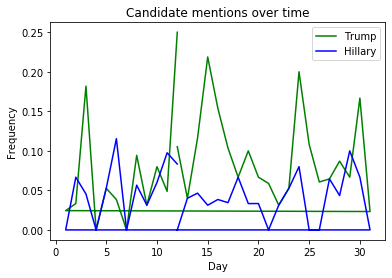

In [84]:
plt.plot(mean_trump.index.day, mean_trump, color = 'green')
plt.plot(mean_hillary.index.day, mean_hillary, color = 'blue')

plt.xlabel('Day'); plt.ylabel('Frequency')
plt.title('Candidate mean mentions per day')
plt.legend(('Trump', 'Hillary'))
plt.show()

In [ ]:
import gensim
from gensim import corpora
